In [3]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#regression librarry
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
#o check accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
# to check accuracy
from sklearn.metrics import *

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv("bike_sharing.csv")

In [5]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
dataset.shape

(17379, 17)

In [7]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


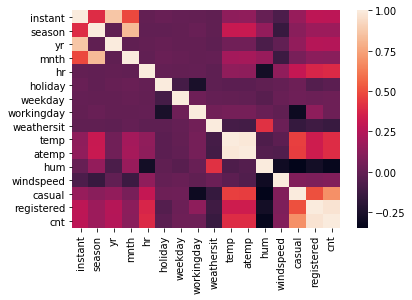

In [10]:
import seaborn as sb
corr=dataset.corr()
sb.heatmap(corr)

In [11]:
# checks correlation with all columns
print(corr['cnt'].sort_values(ascending=False)[:])

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [12]:
dataset = dataset[['registered','cnt']]


In [13]:
# dataset

In [14]:
train,test=train_test_split(dataset,test_size=0.2,random_state=0)

In [15]:
train.shape,test.shape

((13903, 2), (3476, 2))

In [16]:
#convert test data into test.csv file
test.to_csv("test.csv",index=False,encoding='utf-8')

In [17]:
train_data,cv_data=train_test_split(train,test_size=0.3,random_state=0)

In [18]:
train_data.shape,cv_data.shape

((9732, 2), (4171, 2))

In [20]:
#to remove the last column in a dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [21]:
x_train.shape,y_train.shape

((9732, 1), (9732,))

In [22]:
#separate the cv_data into x_cv and y_cv
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values


In [23]:
x_cv.shape,y_cv.shape

((4171, 1), (4171,))

In [24]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [25]:
x_cv=sc.transform(x_cv)

In [26]:

# # fitting simple linear regression model to the training dataset
lin_reg = LinearRegression(normalize=True)  
lin_reg.fit( x_train, y_train)  

# fitting polynomial regression model to the training dataset
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
# fit into multiple Linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#predicting the train set results
y_predict=lin_reg2.predict(poly_reg.fit_transform(x_train))
# pd.DataFrame({'Actual':y_train,'Predicated':y_predict})

In [28]:
# getting predictions on cross validation dataset
y_pred = lin_reg2.predict(poly_reg.fit_transform(x_cv))
# pd.DataFrame({'Actual':y_cv,'Predicated':y_pred})

In [29]:
acc_train=r2_score(y_train,y_predict)*100
print("Accuracy of train data =",acc_train)

acc_cv=r2_score(y_cv,y_pred)*100
print("Accuracy of cross validation data =",acc_train)




Accuracy of train data = 95.24603556595468
Accuracy of cross validation data = 95.24603556595468


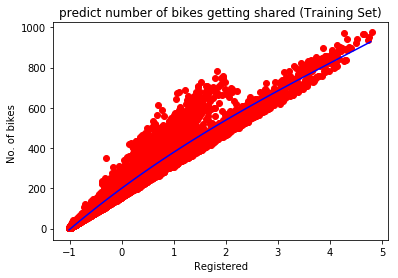

In [30]:

# visualizing the training set result
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('predict number of bikes getting shared (Training Set)')
plt.xlabel('Registered')
plt.ylabel('No. of bikes ')
plt.show()

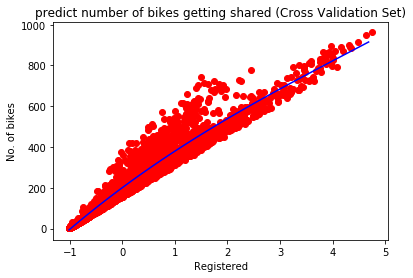

In [31]:
# visualizing the testing set result
x_grid=np.arange(min(x_cv),max(x_cv),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('predict number of bikes getting shared (Cross Validation Set)')
plt.xlabel('Registered')
plt.ylabel('No. of bikes')
plt.show()

In [32]:
fileObject = open("train_data.pkl",'wb')
pickle.dump(poly_reg,fileObject)   
# here we close the fileObject
pickle.dump(lin_reg2,fileObject)
fileObject.close()
